# Set up notebook

In [1]:
%load_ext rpy2.ipython

## r libraries

In [3]:
%%R
library(dplyr)
library(Seurat)
library(patchwork)
library(data.table)
library(DropletUtils)
library(scRNAseq)
library(scater)
library(scran)
library(PCAtools)
set.seed(110010101)

path_to <- "VEX2_RNAi_2_count6/outs/"

## python libraries

In [4]:
#!conda env export > environment.yml

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

path_to = "VEX2_RNAi_2_count6/outs/"

## Estimate and remove Background

R[write to console]: Loading raw count data

R[write to console]: Loading cell-only count data

R[write to console]: Loading extra analysis data where available

R[write to console]: 4 genes passed tf-idf cut-off and 3 soup quantile filter.  Taking the top 3.

R[write to console]: Using 19 independent estimates of rho.

R[write to console]: Estimated global rho of 0.35

R[write to console]: Estimated contamination is very high (0.35).

R[write to console]: Expanding counts from 11 clusters to 12176 cells.



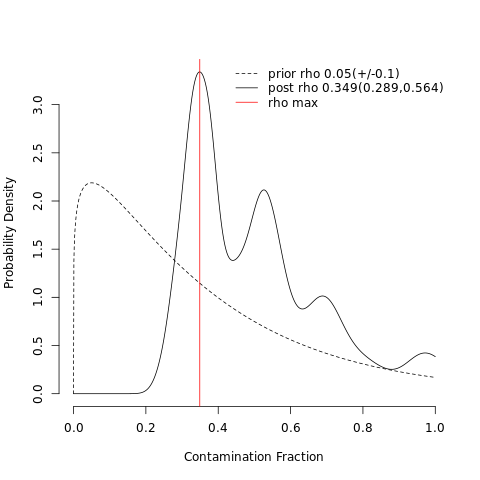

In [6]:
%%R
library(SoupX)
sce = load10X('VEX2_RNAi_2_count6/outs/')
sce = autoEstCont(sce, tfidfMin=0.85, forceAccept=TRUE)#, priorRhoStdDev = 0.3
out = adjustCounts(sce, roundToInt=TRUE)

In [7]:
%%R
head(sce$soupProfile[order(sce$soupProfile$est, decreasing = TRUE), ], n = 20)
#head(sce$soupProfile)

                              est counts
vsg-2-Tb427.BES40.22  0.033842641  40013
rRNA-Tb927.2.1975     0.023509610  27796
gene-Tb427.BES40.3    0.007130865   8431
gene-Tb427.BES40.4    0.005826655   6889
Tb927.1.2390          0.005100121   6030
vsg-6-Tb427.BES15.12  0.004355824   5150
Tb927.5.1810          0.002931512   3466
Tb927.5.810           0.002484089   2937
Tb927.10.8940         0.002229505   2636
gene-Tb427.BES40.6    0.001998604   2363
vsg-15-Tb427.BES134.6 0.001925021   2276
Tb927.2.370           0.001912334   2261
Tb927.10.10260        0.001842133   2178
maxic-12S             0.001830292   2164
gene-Tb427.BES40.1    0.001826063   2159
Tb11.1810b            0.001818451   2150
vsg-17-Tb427.BES56.13 0.001747404   2066
rRNA-Tb927.6.187      0.001719493   2033
Tb927.3.3270          0.001618844   1914
gene-Tb427.BES40.7    0.001599391   1891


In [8]:
#Tb927.1.2390 beta tubulin
#Tb927.1.2390 ysosomal/endosomal membrane protein p67
#Tb11.v5.0498 lysosomal alpha-mannosidase precursor, putative
#Tb927.10.8940 flagellum targeting protein kharon1, putative
#Tb927.3.3270 ATP-dependent 6-phosphofructokinase, glycosomal

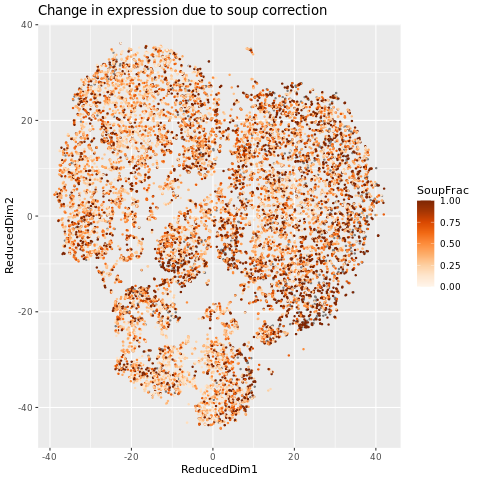

In [9]:
%%R
plotChangeMap(sce, out, "vsg-6-Tb427.BES15.12")

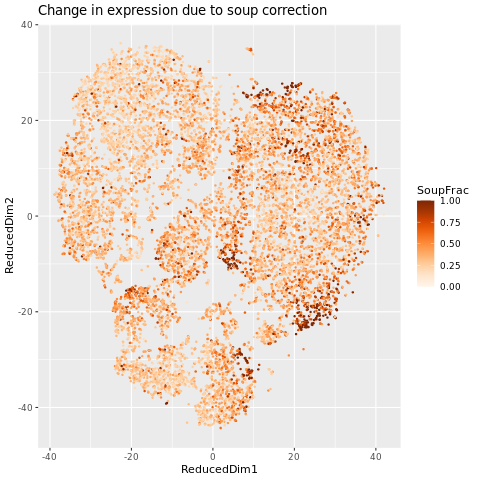

In [10]:
%%R
plotChangeMap(sce, out, "vsg-2-Tb427.BES40.22")

In [11]:
#%%R
#vsgGenes = c("vsg-6-Tb427.BES15.12", "vsg-2-Tb427.BES40.22")
#useToEst = estimateNonExpressingCells(sce, nonExpressedGeneList = list(vsgGenes = vsgGenes))
#sce = calculateContaminationFraction(sce, list(vsgGenes = vsgGenes), useToEst = useToEst)

In [12]:
#%%R
#sce = calculateContaminationFraction(sce, 
#                                     list(vsgGenes = vsgGenes), 
#                                     useToEst = useToEst, forceAccept=TRUE)

In [13]:
#%%R
#plotMarkerDistribution(sce)

# Load dataset

In [14]:
%%R
sce <- SingleCellExperiment(assays = list(counts = out))
sce

class: SingleCellExperiment 
dim: 11497 12176 
metadata(0):
assays(1): counts
rownames(11497): gene-Tb427.BES40.1 gene-Tb427.BES40.2 ... Tb11.1770
  Tb11.1800
rowData names(0):
colnames(12176): AAACCCAAGAAACACT-1 AAACCCAAGAGCCTGA-1 ...
  TTTGTTGGTTTACTGG-1 TTTGTTGTCCGCAACG-1
colData names(0):
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [15]:
%%R
assayNames(sce)

[1] "counts"


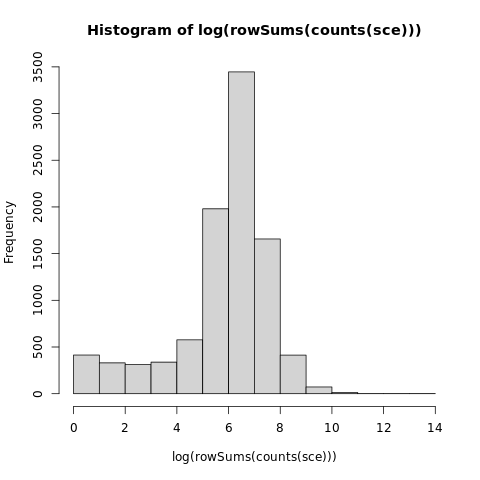

In [16]:
%%R
hist(log(rowSums(counts(sce))))

In [17]:
%%R
head(colSums(counts(sce))>25)

AAACCCAAGAAACACT-1 AAACCCAAGAGCCTGA-1 AAACCCAAGAGCGACT-1 AAACCCAAGCCTGTGC-1 
              TRUE               TRUE               TRUE               TRUE 
AAACCCAAGTTCTACG-1 AAACCCACAAGATTGA-1 
              TRUE               TRUE 


In [18]:
'''
%%R
%%R
sce <- SingleCellExperiment(assays = list(counts = out))
sce

is.vsg <- grepl("^vsg-", rownames(sce))
sce_vsg <- sce[which(is.vsg), ]
keep_feature <- colSums(counts(sce_vsg)) > 0
sce_vsg <- sce_vsg[, keep_feature]
sce_vsg


test <- as.matrix(counts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex2_1.csv",sep=''),sep = ",")
'''

'\n%%R\n%%R\nsce <- SingleCellExperiment(assays = list(counts = out))\nsce\n\nis.vsg <- grepl("^vsg-", rownames(sce))\nsce_vsg <- sce[which(is.vsg), ]\nkeep_feature <- colSums(counts(sce_vsg)) > 0\nsce_vsg <- sce_vsg[, keep_feature]\nsce_vsg\n\n\ntest <- as.matrix(counts(sce_vsg))\nwrite.table(test,file=paste("new_count_vsg_vex2_1.csv",sep=\'\'),sep = ",")\n'

In [19]:
#df = pd.read_csv("new_count_vsg_vex2_1.csv")
#df.head()
#rownames(sce)
#is.vsg <- grepl("^vsg-", rownames(sce))

In [20]:
#select = df.loc[['vsg-17-Tb427.BES56.13',
#                'vsg-15-Tb427.BES134.6',
#                'vsg-6-Tb427.BES15.12',
#                'vsg-2-Tb427.BES40.22']]
#df.sum(axis=1).sort_values()

In [21]:
#select = select.T
#select['ngroup']=(select>0).sum(axis=1)
#select.head()
#sce_vsg <- sce[which(is.vsg2), ]
#is.vsg19 <- grepl("vsg-19-", rownames(sce_vsg))
#sce_vsg <- sce_vsg[which(!is.vsg19), ]
#sce_vsg

In [22]:
#select.sort_values('vsg-17-Tb427.BES56.13')

In [23]:
#select.groupby('ngroup').plot(x='vsg-17-Tb427.BES56.13',y='vsg-2-Tb427.BES40.22',kind='scatter')

In [24]:
#import numpy as np
#np.log1p(select['vsg-17-Tb427.BES56.13']).plot(kind='hist')

In [25]:
#%%R
#plotExprsFreqVsMean(sce)

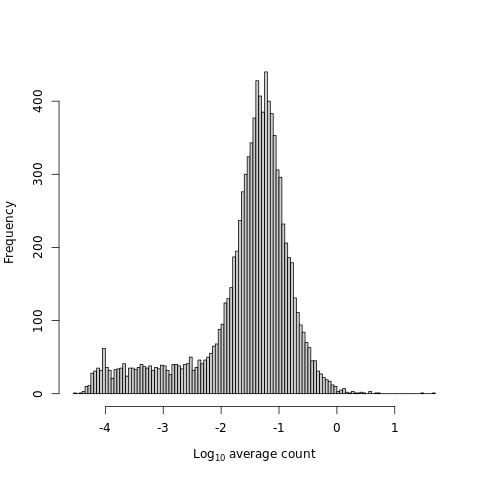

In [26]:
%%R
ave.counts <- calculateAverage(sce)
hist(log10(ave.counts), breaks=100, main="", col="grey80", 
    xlab=expression(Log[10]~"average count"))

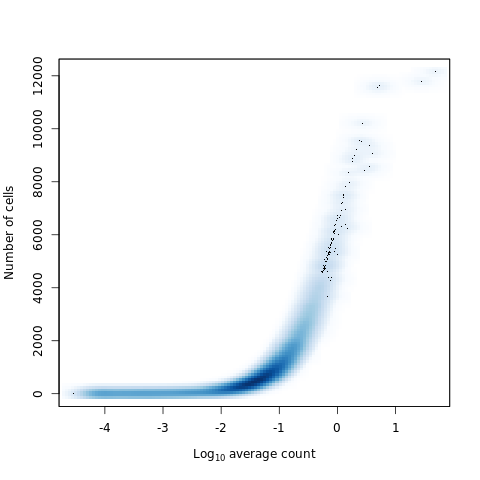

In [27]:
%%R
num.cells <- nexprs(sce, byrow=TRUE)
smoothScatter(log10(ave.counts), num.cells, ylab="Number of cells", 
    xlab=expression(Log[10]~"average count"))

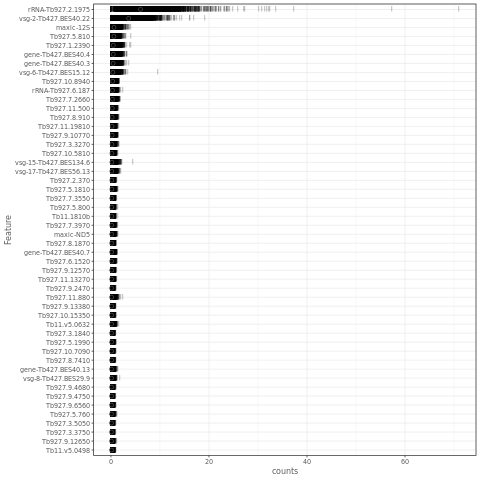

In [28]:
%%R
plotHighestExprs(sce,  as_percentage = TRUE)

# Add QC 
Default testing sum and detected transcripts plus:
- maxicircle
- ribosomal RNA
- VSGs

In [29]:
%%R
is.mito <- grepl("^maxic", rownames(sce))
is.vsg <- grepl("^vsg-", rownames(sce))
is.Ribo <-grepl("^rRNA-", rownames(sce)) 
df <- perCellQCMetrics(counts(sce), subsets=list(Mito=is.mito, VSG=is.vsg, Ribo=is.Ribo))
head(df)

DataFrame with 6 rows and 11 columns
                         sum  detected subsets_Mito_sum subsets_Mito_detected
                   <numeric> <integer>        <numeric>             <integer>
AAACCCAAGAAACACT-1       965       694                6                     3
AAACCCAAGAGCCTGA-1      1063       676               20                     6
AAACCCAAGAGCGACT-1      1092       689                8                     4
AAACCCAAGCCTGTGC-1       892       653                9                     6
AAACCCAAGTTCTACG-1      1092       656                9                     4
AAACCCACAAGATTGA-1      1054       793               13                     4
                   subsets_Mito_percent subsets_VSG_sum subsets_VSG_detected
                              <numeric>       <numeric>            <integer>
AAACCCAAGAAACACT-1             0.621762              56                    6
AAACCCAAGAGCCTGA-1             1.881468              62                    9
AAACCCAAGAGCGACT-1             

In [30]:
#%%R
#sce <- perCellQCMetrics(sce, subsets=list(vsg=is.vsg, Mt=is.mito, Ribo=is.Ribo))

#par(mfrow=c(2,2), mar=c(5.1, 4.1, 0.1, 0.1))
#hist(sce$total_counts/1e3, xlab="Library sizes (thousands)", main="", 
#    breaks=20, col="grey80", ylab="Number of cells")
#hist(sce$total_features, xlab="Number of expressed genes", main="", 
#    breaks=20, col="grey80", ylab="Number of cells")
#hist(sce$pct_counts_Ribo, xlab="ERCC proportion (%)",
#    ylab="Number of cells", breaks=20, main="", col="grey80")
#hist(sce$pct_counts_Mt, xlab="Mitochondrial proportion (%)", 
#    ylab="Number of cells", breaks=20, main="", col="grey80")


In [31]:
#%%R
#sce$pct_counts_Ribo

In [32]:
#%%R
#sum(is.Ribo)

# Test x outlayers

In [33]:
%%R
# not too high / not too low
qc.lib2 <- isOutlier(df$sum, nmads = 1, log=TRUE, type="lower")
qc.lib2b <- isOutlier(df$sum, nmads = 3, log=TRUE, type="higher")
qc.nexprs2 <- isOutlier(df$detected, nmads = 1, log=TRUE, type="lower")
qc.vsg2 <- isOutlier(df$subsets_VSG_percent, nmads = 1, type="lower")

# not too high
qc.mito2 <- isOutlier(df$subsets_Mito_percent, nmads = 2, type="higher")
qc.ribo2 <- isOutlier(df$subsets_Ribo_percent, nmads = 2, type="higher")

discard2 <- qc.lib2 | qc.nexprs2 | qc.mito2 | qc.ribo2 | qc.vsg2 | qc.lib2b
sum(discard2)

[1] 4117


## add discarded info to the sce object

In [34]:
%R sce$discard_mito <- qc.mito2
%R sce$discard_sum <- qc.lib2
%R sce$discard_sum2 <- qc.lib2b
%R sce$discard_detect <- qc.nexprs2
%R sce$discard_vsg <- qc.vsg2
%R sce$discard_ribo <- qc.ribo2

%R sce$discard_all <- discard2

0,0,0,...,0,0,1


## quick add qc to sce

In [35]:
%%R
sce <- addPerCellQC(sce, subsets=list(Mito=is.mito, VSG=is.vsg, Ribo=is.Ribo))
sce

class: SingleCellExperiment 
dim: 11497 12176 
metadata(0):
assays(1): counts
rownames(11497): gene-Tb427.BES40.1 gene-Tb427.BES40.2 ... Tb11.1770
  Tb11.1800
rowData names(0):
colnames(12176): AAACCCAAGAAACACT-1 AAACCCAAGAGCCTGA-1 ...
  TTTGTTGGTTTACTGG-1 TTTGTTGTCCGCAACG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [36]:
%%R
sce <- sce[, which(!discard2)]
sce

class: SingleCellExperiment 
dim: 11497 8059 
metadata(0):
assays(1): counts
rownames(11497): gene-Tb427.BES40.1 gene-Tb427.BES40.2 ... Tb11.1770
  Tb11.1800
rowData names(0):
colnames(8059): AAACCCAAGAAACACT-1 AAACCCAAGAGCCTGA-1 ...
  TTTGTTGGTTAGAGAT-1 TTTGTTGGTTTACTGG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [37]:
%%R
test <- as.matrix(counts(sce))
write.table(test,file=paste("vex2_2_all_genes.csv",sep=''),sep = ",")

In [27]:
tmp_df = pd.read_csv("vex2_2_all_genes.csv")
main_vsg = 'vsg-2-Tb427.BES40.22'
all_other = [n for n in tmp_df.index.values if n.startswith('vsg-') and not n.startswith('vsg-2-') ]

In [28]:
vsg_df = tmp_df.loc[all_other]
vsg_df.head()

,AAACCCAAGAAACACT-1,AAACCCAAGAGCCTGA-1,AAACCCAAGAGCGACT-1,AAACCCAAGCCTGTGC-1,AAACCCAAGTTCTACG-1,AAACCCACAATCAGCT-1,AAACCCACACTCTAGA-1,AAACCCACATGACAAA-1,AAACCCAGTAAGAACT-1,AAACCCAGTCAAACGG-1,...,TTTGGTTAGTCAGGGT-1,TTTGGTTCAGCTATTG-1,TTTGGTTGTAGAGATT-1,TTTGGTTGTAGCACAG-1,TTTGGTTGTTGTGTAC-1,TTTGGTTTCGAAATCC-1,TTTGTTGAGATACCAA-1,TTTGTTGCAATGCAAA-1,TTTGTTGGTTAGAGAT-1,TTTGTTGGTTTACTGG-1
vsg-9-Tb427.BES129.14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vsg-6-Tb427.BES15.12,0,6,16,0,19,18,0,4,5,7,...,1,0,2,2,6,16,1,1,4,1
vsg-21-Tb427.BES28.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vsg-18-Tb427.BES98.12,0,1,0,0,1,4,0,6,0,1,...,0,0,0,0,0,2,0,0,0,0
vsg-3-Tb427.BES65.13,1,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
zero_counts = vsg_df.eq(0).sum()
number_of_other_vsg = vsg_df.shape[0]-zero_counts
number_of_other_vsg

AAACCCAAGAAACACT-1    5
AAACCCAAGAGCCTGA-1    8
AAACCCAAGAGCGACT-1    4
AAACCCAAGCCTGTGC-1    3
AAACCCAAGTTCTACG-1    4
                     ..
TTTGGTTTCGAAATCC-1    5
TTTGTTGAGATACCAA-1    2
TTTGTTGCAATGCAAA-1    4
TTTGTTGGTTAGAGAT-1    3
TTTGTTGGTTTACTGG-1    4
Length: 8059, dtype: int64

In [30]:
import seaborn as sns
dict_cell_only_vsg = {}
for item in range(0, 20):
    dict_cell_only_vsg[item]=[]
dict_cell_only_vsg[0]

[]

In [31]:
for item in range(0, 20):
    print(item)
    cell_only_vsg = []
    for cell in tmp_df.columns:
        if tmp_df.loc[main_vsg][cell] > 0:
            if number_of_other_vsg[cell]==item:
                dict_cell_only_vsg[item].append(cell) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [32]:
for item in range(0, 20):
    print(item, len(dict_cell_only_vsg[item]))

0 257
1 853
2 1747
3 2030
4 1654
5 930
6 400
7 125
8 39
9 9
10 3
11 0
12 0
13 1
14 0
15 0
16 0
17 0
18 0
19 0


In [33]:
print(1)

1


In [34]:
all_ratios = []
for item in range(0, 11):
    ratios=[]
    cells  = dict_cell_only_vsg[item]
    for cell in cells:
        r = tmp_df[cell][main_vsg]/tmp_df[cell].sum()
        ratios.append(r)
    temp_data = pd.DataFrame()
    temp_data['cells']=cells
    temp_data['ratios']=ratios
    temp_data['group']=item
    #print(temp_data.head())
    all_ratios.append(temp_data)
all_ratios = pd.concat(all_ratios)
all_ratios.head()

,cells,ratios,group
0,AAAGGGCAGGATACCG-1,0.042836,0
1,AAAGGTATCATGAGGG-1,0.044118,0
2,AACAAAGAGGACGGAG-1,0.026398,0
3,AACAACCAGTTGAAGT-1,0.040000,0
4,AACAACCCATCTCGTC-1,0.063470,0


In [35]:
all_ratios.to_csv('dataset_vex2_rnai2_vsg2.csv')

<AxesSubplot:xlabel='group', ylabel='ratios'>

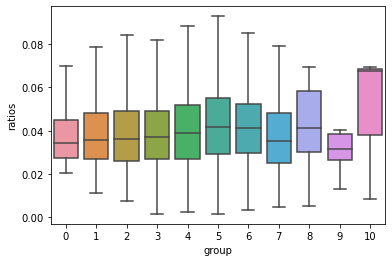

In [36]:
import seaborn as sns
sns.boxplot(data=all_ratios,x='group',y='ratios',showfliers=False)

In [37]:
all_ratios = []
for item in range(0, 11):
    ratios=[]
    cells  = dict_cell_only_vsg[item]
    for cell in cells:
        r = tmp_df[cell][[main_vsg]+all_other].sum()/tmp_df[cell].sum()
        ratios.append(r)
    temp_data = pd.DataFrame()
    temp_data['cells']=cells
    temp_data['ratios']=ratios
    temp_data['group']=item
    #print(temp_data.head())
    all_ratios.append(temp_data)
all_ratios = pd.concat(all_ratios)
all_ratios.head()

,cells,ratios,group
0,AAAGGGCAGGATACCG-1,0.042836,0
1,AAAGGTATCATGAGGG-1,0.044118,0
2,AACAAAGAGGACGGAG-1,0.026398,0
3,AACAACCAGTTGAAGT-1,0.040000,0
4,AACAACCCATCTCGTC-1,0.063470,0


<AxesSubplot:xlabel='group', ylabel='ratios'>

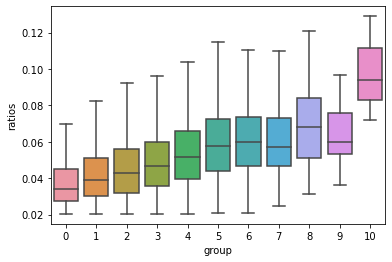

In [38]:
import seaborn as sns
sns.boxplot(data=all_ratios,x='group',y='ratios',showfliers=False)

In [39]:
all_ratios.to_csv('dataset_vex2_rnai2_allvsg.csv')

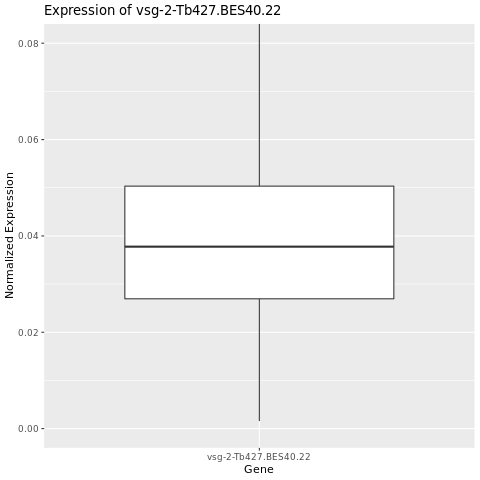

In [44]:
%%R



library(ggplot2)
library(SingleCellExperiment)

plot_gene_expression <- function(sce, gene) {
  # Extract count data
  counts <- assays(sce)$counts
  
  # Extract gene counts and total counts for each cell
  gene_counts <- counts[gene, ]
  total_counts <- colSums(counts)
  
  # Filter out cells with zero counts for the given gene
  nonzero <- gene_counts > 0
  gene_counts <- gene_counts[nonzero]
  total_counts <- total_counts[nonzero]
  
  # Normalize gene counts by total counts for each cell
  ratios <- gene_counts / total_counts
  
  # Create data frame
  df <- data.frame(Ratio = ratios)
  
  # Calculate the 1st and 3rd quartiles and the interquartile range
  Q1 <- quantile(df$Ratio, 0.25)
  Q3 <- quantile(df$Ratio, 0.75)
  IQR <- Q3 - Q1
  
  # Set the y-axis limits to the [1st quartile - 1.5*IQR, 3rd quartile + 1.5*IQR] range
  y_min <- 0 #max(0, Q1 - 1.5 * IQR)
  y_max <- 0.08#Q3 + 1.5 * IQR
  
  # Plot
  ggplot(df, aes(x = gene, y = Ratio)) +
    geom_boxplot(outlier.shape = NA) +  # This line removes the outliers
    coord_cartesian(ylim = c(y_min, y_max)) +  # This line sets the y-axis limits
    labs(title = paste("Expression of", gene), x = "Gene", y = "Normalized Expression")
}



# Call the function
plot_gene_expression(sce, "vsg-2-Tb427.BES40.22")


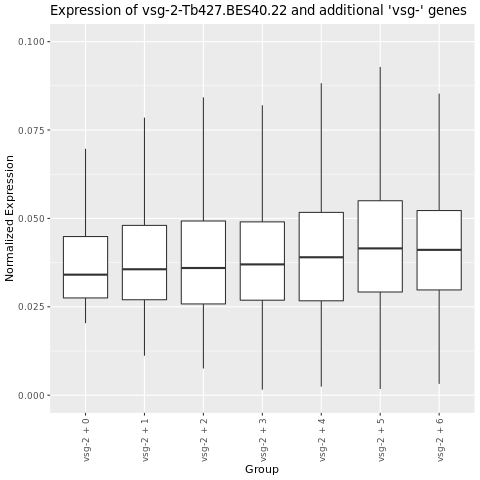

In [50]:
%%R
library(ggplot2)
library(SingleCellExperiment)

plot_gene_expression <- function(sce, main_gene, max_additional_genes = 6) {
  # Extract count data
  counts <- assays(sce)$counts
  
  # Identify the 'vsg-' genes
  vsg_genes <- rownames(counts)[grepl("^vsg-", rownames(counts)) & rownames(counts) != main_gene]
  
  # Get the counts for the main gene and the 'vsg-' genes
  main_gene_counts <- counts[main_gene, ]
  vsg_gene_counts <- counts[vsg_genes, ]
  
  # Identify which cells express the main gene and how many additional 'vsg-' genes each cell expresses
  main_gene_expressed <- main_gene_counts > 0
  additional_genes_expressed <- rowSums(t(vsg_gene_counts) > 0)
  
  # Initialize a data frame to store all the data
  df_all <- data.frame(Group = character(), Ratio = numeric())
  
  # Filter the cells based on the main gene expression and the number of additional 'vsg-' genes expressed
  for (i in 0:max_additional_genes) {
    cells <- main_gene_expressed & additional_genes_expressed == i
    if (any(cells)) {
      # Calculate the ratios for the main gene in the selected cells
      gene_counts <- main_gene_counts[cells]
      total_counts <- colSums(counts[, cells])
      ratios <- gene_counts / total_counts
      
      # Create a data frame
      df <- data.frame(Group = paste("vsg-2 +", i), Ratio = ratios)
      
      # Add the data to the main data frame
      df_all <- rbind(df_all, df)
    }
      
  write.csv(df_all, file = 'vex2_2.boxplot.csv', row.names = FALSE)
  }
  
    
  y_min <- 0 #max(0, Q1 - 1.5 * IQR)
  y_max <- 0.1#Q3 + 1.5 * IQR
   
  # Plot
  ggplot(df_all, aes(x = Group, y = Ratio)) +
    geom_boxplot(outlier.shape = NA) +  # This line removes the outliers
    coord_cartesian(ylim = c(y_min, y_max)) +  # This line removes the outliers
    labs(title = paste("Expression of", main_gene, "and additional 'vsg-' genes"), x = "Group", y = "Normalized Expression") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
}

# Call the function
plot_gene_expression(sce, "vsg-2-Tb427.BES40.22")


In [37]:
%%R
#is.vsg6 <- grepl("^vsg-6-", rownames(sce))
#is.vsg8 <- grepl("^vsg-8-", rownames(sce))
#is.vsg15 <- grepl("^vsg-15-", rownames(sce))
#is.vsg17 <- grepl("^vsg-17-", rownames(sce))
is.vsg <- grepl("^vsg-", rownames(sce))
#is.vsg <- is.vsg6 | is.vsg8 | is.vsg15 | is.vsg17 | is.vsg2

In [39]:
#!head vex2_2_all_genes.csv

In [38]:
%%R

#is.vsg <- grepl("^vsg-", rownames(sce))
sce_vsg <- sce[which(is.vsg), ]
sce_vsg
#sce_vsg <- SingleCellExperiment(assays = list(counts = counts(sce_vsg))

#sce_vsg

class: SingleCellExperiment 
dim: 22 8059 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(8059): AAACCCAAGAAACACT-1 AAACCCAAGAGCCTGA-1 ...
  TTTGTTGGTTAGAGAT-1 TTTGTTGGTTTACTGG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [39]:
%%R
test <- as.matrix(counts(sce_vsg))
write.table(test,file=paste("temp_count_vsg_vex2_2.csv",sep=''),sep = ",")



In [40]:
temp_count = pd.read_csv('temp_count_vsg_vex2_2.csv')
temp_count.head()

,AAACCCAAGAAACACT-1,AAACCCAAGAGCCTGA-1,AAACCCAAGAGCGACT-1,AAACCCAAGCCTGTGC-1,AAACCCAAGTTCTACG-1,AAACCCACAATCAGCT-1,AAACCCACACTCTAGA-1,AAACCCACATGACAAA-1,AAACCCAGTAAGAACT-1,AAACCCAGTCAAACGG-1,...,TTTGGTTAGTCAGGGT-1,TTTGGTTCAGCTATTG-1,TTTGGTTGTAGAGATT-1,TTTGGTTGTAGCACAG-1,TTTGGTTGTTGTGTAC-1,TTTGGTTTCGAAATCC-1,TTTGTTGAGATACCAA-1,TTTGTTGCAATGCAAA-1,TTTGTTGGTTAGAGAT-1,TTTGTTGGTTTACTGG-1
vsg-2-Tb427.BES40.22,47,39,48,33,128,59,13,109,53,71,...,23,28,21,43,40,141,28,36,37,17
vsg-9-Tb427.BES129.14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vsg-6-Tb427.BES15.12,0,6,16,0,19,18,0,4,5,7,...,1,0,2,2,6,16,1,1,4,1
vsg-21-Tb427.BES28.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vsg-18-Tb427.BES98.12,0,1,0,0,1,4,0,6,0,1,...,0,0,0,0,0,2,0,0,0,0


In [41]:
temp_count.sum(axis=1).sort_values()

vsg-19-Tb427.BES10.10          0
vsg-mes-Tb427VSG-639           5
vsg-mes-Tb427VSG-559           9
vsg-16-Tb427.BES122.11        18
vsg-mes-Tb427VSG-636          21
vsg-mes-Tb427VSG-1954        151
vsg-21-Tb427.BES28.15        160
vsg-mes-Tb427VSG-3591        184
vsg-mes-Tb427VSG-397         304
vsg-mes-Tb427VSG-531         378
vsg-9-Tb427.BES129.14        755
vsg-11-Tb427.BES126.15       826
vsg-mes-Tb427VSG-653         847
vsg-14-Tb427.BES64.2         890
vsg-13-Tb427.BES51.12       1007
vsg-3-Tb427.BES65.13        1041
vsg-18-Tb427.BES98.12       3093
vsg-8-Tb427.BES29.9         8098
vsg-17-Tb427.BES56.13      13089
vsg-15-Tb427.BES134.6      13835
vsg-6-Tb427.BES15.12       28872
vsg-2-Tb427.BES40.22      280430
dtype: int64

In [42]:
'''
%%R
is.vsg19 <- grepl("^vsg-19-", rownames(sce_vsg))
is.mes639 <- grepl("vsg-mes-Tb427VSG-639", rownames(sce_vsg))
is.mes559 <- grepl("^vsg-mes-Tb427VSG-559", rownames(sce_vsg))
#is.mes3591 <- grepl("^vsg-mes-Tb427VSG-3591", rownames(sce_vsg))
#is.vsg16 <- grepl("^vsg-16-", rownames(sce_vsg))
#is.mes636 <- grepl("^vsg-mes-Tb427VSG-636", rownames(sce_vsg))

discard <- is.vsg19 | is.mes639 | is.mes559 #| is.mes3591 | is.vsg16 | is.mes636
retain <- !discard
head(retain)

sce_vsg <- sce_vsg[which(retain), ]
sce_vsg
'''

'\n%%R\nis.vsg19 <- grepl("^vsg-19-", rownames(sce_vsg))\nis.mes639 <- grepl("vsg-mes-Tb427VSG-639", rownames(sce_vsg))\nis.mes559 <- grepl("^vsg-mes-Tb427VSG-559", rownames(sce_vsg))\n#is.mes3591 <- grepl("^vsg-mes-Tb427VSG-3591", rownames(sce_vsg))\n#is.vsg16 <- grepl("^vsg-16-", rownames(sce_vsg))\n#is.mes636 <- grepl("^vsg-mes-Tb427VSG-636", rownames(sce_vsg))\n\ndiscard <- is.vsg19 | is.mes639 | is.mes559 #| is.mes3591 | is.vsg16 | is.mes636\nretain <- !discard\nhead(retain)\n\nsce_vsg <- sce_vsg[which(retain), ]\nsce_vsg\n'

In [43]:
'''
%%R
keep_feature <- colSums(counts(sce_vsg)) > 25
sce_vsg <- sce_vsg[, keep_feature]
sce_vsg
'''




'\n%%R\nkeep_feature <- colSums(counts(sce_vsg)) > 25\nsce_vsg <- sce_vsg[, keep_feature]\nsce_vsg\n'

In [44]:
%%R
#sce_vsg <- SingleCellExperiment(assays = list(counts = as.matrix(counts(sce_vsg)))
sce_vsg

class: SingleCellExperiment 
dim: 22 8059 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(8059): AAACCCAAGAAACACT-1 AAACCCAAGAGCCTGA-1 ...
  TTTGTTGGTTAGAGAT-1 TTTGTTGGTTTACTGG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [45]:
%%R
saveRDS(sce_vsg, paste("sce_vsg_vex2_2.rds",sep=''))

In [45]:
#%%R
#test <- as.matrix(counts(sce_vsg))
#write.table(test,file=paste("new_count_vsg_vex2_1_681517.csv",sep=''),sep = ",")



In [46]:
print(1)

1


In [46]:
%%R
keep_feature <- colSums(counts(sce_vsg)) > 45
sce_vsg <- sce_vsg[, keep_feature]
sce_vsg

class: SingleCellExperiment 
dim: 22 3084 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(3084): AAACCCAAGAAACACT-1 AAACCCAAGAGCCTGA-1 ...
  TTTGTTGCAATGCAAA-1 TTTGTTGGTTAGAGAT-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [47]:
%%R
#clust.sce <- quickCluster(sce_vsg)
sce_vsg <- computeSumFactors(sce_vsg)#, cluster=clust.sce, min.mean=0.1)
sce_vsg <- logNormCounts(sce_vsg)
assayNames(sce_vsg)

[1] "counts"    "logcounts"


In [48]:
%%R
test <- as.matrix(counts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex2_2.csv",sep=''),sep = ",")



In [49]:
%%R
test <- as.matrix(logcounts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex2_2_norm.csv",sep=''),sep = ",")



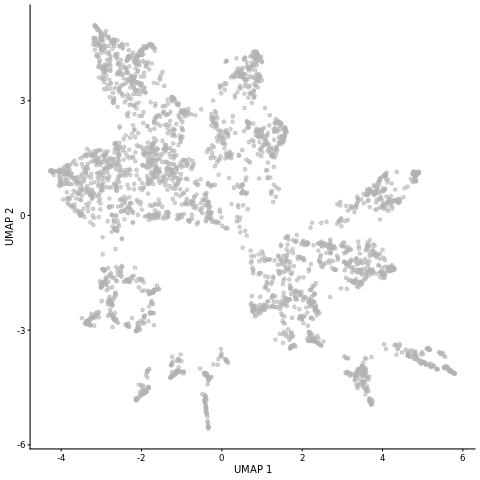

In [50]:
%%R
sce_vsg <- runUMAP(sce_vsg)
#sce_vsg
plotReducedDim(sce_vsg, dimred="UMAP")

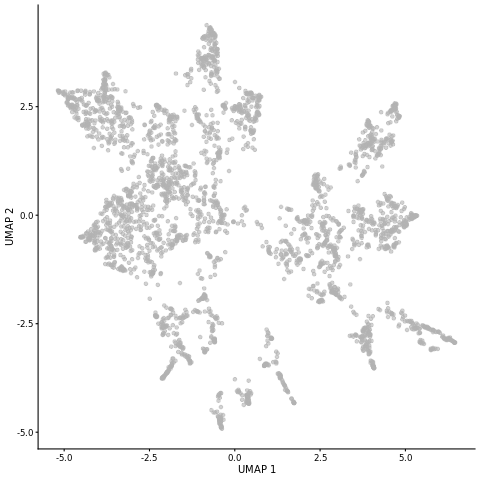

In [51]:
%%R
sce_vsg <- runUMAP(sce_vsg)
#sce_vsg
plotReducedDim(sce_vsg, dimred="UMAP")

In [52]:
%%R
library(bluster)
#clust.5 <- clusterCells(sce.pbmc, use.dimred="PCA", )


#nn.clusters <- clusterCells(sce_vsg, use.dimred="UMAP")
nn.clusters <- clusterCells(sce_vsg, assay.type='logcounts', BLUSPARAM=NNGraphParam(k=25))
table(nn.clusters)


nn.clusters
   1    2    3    4    5    6    7    8    9 
 329  700  349   93 1007  314   47  165   80 


## Plot Cluster
- here an attempt to use log counts for clustering.
- the cluster are visualized using umap 


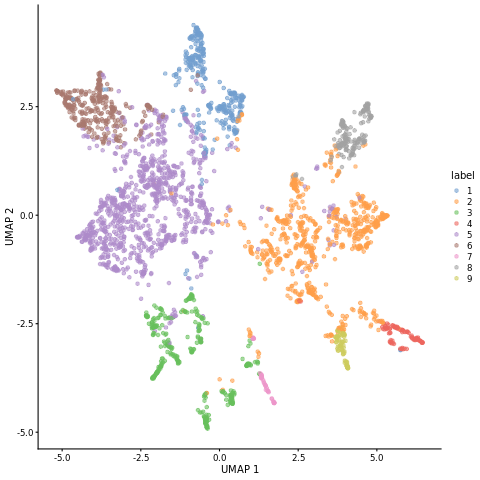

In [53]:
%%R
colLabels(sce_vsg) <- nn.clusters
plotReducedDim(sce_vsg, "UMAP", colour_by="label")

## Plot z-score
here we compute and plot z scores for each vsgs

R[write to console]: 
Attaching package: 'celda'


R[write to console]: The following objects are masked from 'package:scater':

    normalizeCounts, plotHeatmap


R[write to console]: The following object is masked from 'package:scuttle':

    normalizeCounts


R[write to console]: The following object is masked from 'package:S4Vectors':

    params




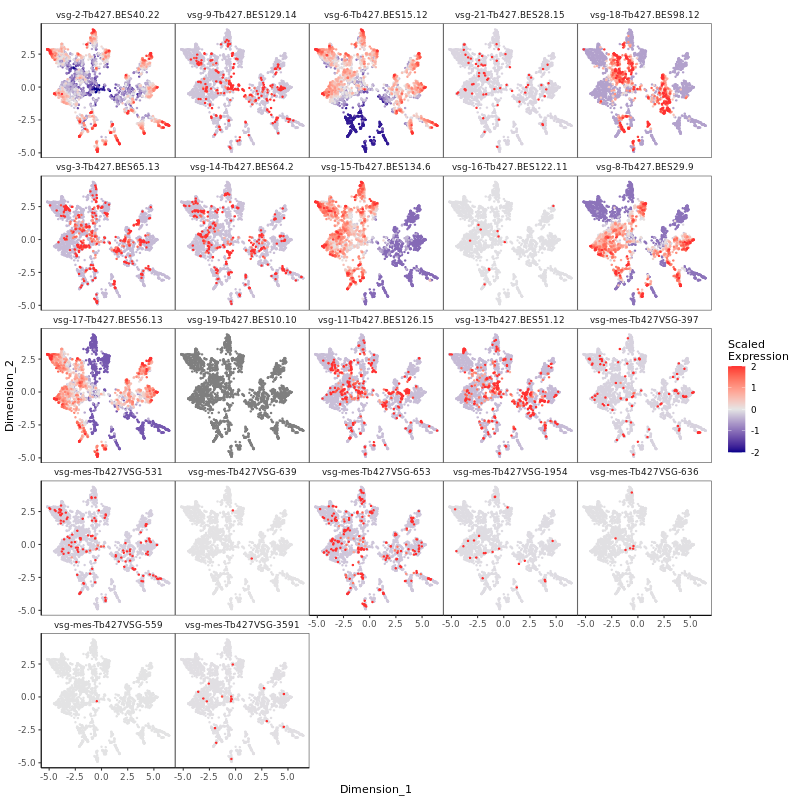

In [54]:
%%R -w 800 -h 800
library(celda)
umap <- reducedDim(sce_vsg, "UMAP")
plotDimReduceFeature(as.matrix(logcounts(sce_vsg)),
    dim1 = umap[, 1],
    dim2 = umap[, 2],
    features = rownames(sce_vsg),#c('vsg-2-Tb427.BES40.22', 'vsg-6-Tb427.BES15.12'),
    exactMatch = TRUE)

## Plot log counts
here we plot the log counts of the vsgs withput scaling

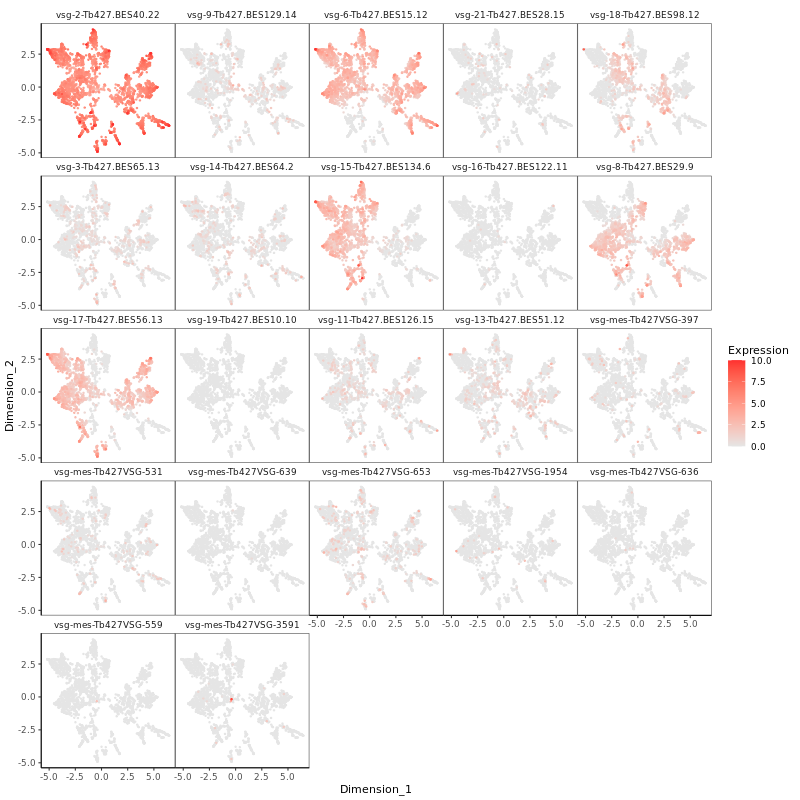

In [55]:
%%R -w 800 -h 800
library(celda)
umap <- reducedDim(sce_vsg, "UMAP")
plotDimReduceFeature(as.matrix(logcounts(sce_vsg)),
    dim1 = umap[, 1],
    dim2 = umap[, 2],
    features = rownames(sce_vsg),#c('vsg-2-Tb427.BES40.22', 'vsg-6-Tb427.BES15.12'),
    exactMatch = TRUE,
    zscore=FALSE,
    trim = c(0, 10),                 
    limits = c(0, 10),)

In [56]:
%%R
max(logcounts(sce_vsg))

[1] 13.28991


In [57]:
%%R
head(colLabels(sce_vsg))

[1] 3 5 5 6 5 2
Levels: 1 2 3 4 5 6 7 8 9


In [58]:
%%R
rd<-reducedDim(sce_vsg, "UMAP")[,1:2]

In [59]:
%R -o rd
umap = pd.DataFrame(rd)
umap.columns = ['comp1','comp2']



In [60]:
%%R
lab<-colLabels(sce_vsg)
head(lab)

[1] 3 5 5 6 5 2
Levels: 1 2 3 4 5 6 7 8 9


In [61]:
%R -o lab
umap = pd.concat([pd.read_csv('new_count_vsg_vex2_2_norm.csv').T.reset_index(),umap],axis=1)
umap=umap.set_index('index')
umap['clusters']=list(lab)
umap.to_csv('new_count_vsg_vex2_2_norm.csv')
umap.head()



,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGAAACACT-1,6.512902,0.0,0.000000,0.0,0.000000,1.546838,0.00000,2.758149,0.0,0.000000,...,2.276056,0.0,1.546838,0.0,0.0,0.0,0.0,-1.991373,-3.637073,3
AAACCCAAGAGCCTGA-1,4.089439,0.0,1.792907,0.0,0.496569,0.865292,1.15870,1.158700,0.0,1.402403,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,-1.513956,-0.589964,5
AAACCCAAGAGCGACT-1,5.073277,0.0,3.571569,0.0,0.000000,0.000000,0.00000,2.688081,0.0,1.604882,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,-4.020341,-0.149115,5
AAACCCAAGTTCTACG-1,6.700268,0.0,4.025669,0.0,0.851672,0.000000,0.00000,0.851672,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,-3.568099,3.022005,6
AAACCCACAATCAGCT-1,5.248233,0.0,3.619483,0.0,1.811068,0.000000,0.70244,0.702440,0.0,1.526953,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,2.632492,-1.303855,5


In [62]:
%R -o rd
umap = pd.DataFrame(rd)
umap.columns = ['comp1','comp2']

In [63]:
%R -o lab
umap = pd.concat([pd.read_csv("new_count_vsg_vex2_2.csv").T.reset_index(),umap],axis=1)
umap=umap.set_index('index')
umap['clusters']=list(lab)
umap.to_csv("new_count_vsg_vex2_2.csv")
umap.head()




,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGAAACACT-1,47,0,0,0,0,1,0,3,0,0,...,2,0,1,0,0,0,0,-1.991373,-3.637073,3
AAACCCAAGAGCCTGA-1,39,0,6,0,1,2,3,3,0,4,...,0,0,0,0,0,0,0,-1.513956,-0.589964,5
AAACCCAAGAGCGACT-1,48,0,16,0,0,0,0,8,0,3,...,0,0,0,0,0,0,0,-4.020341,-0.149115,5
AAACCCAAGTTCTACG-1,128,0,19,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,-3.568099,3.022005,6
AAACCCACAATCAGCT-1,59,0,18,0,4,0,1,1,0,3,...,0,0,0,0,0,0,0,2.632492,-1.303855,5


In [64]:
%%R
count_feature <- colSums(counts(sce_vsg)>0)


## Plot umap vsg size
The umap is color coded by the number ov vsgs expressed in each cell
The center yellow blob show the cell expressin all 5 vsgs

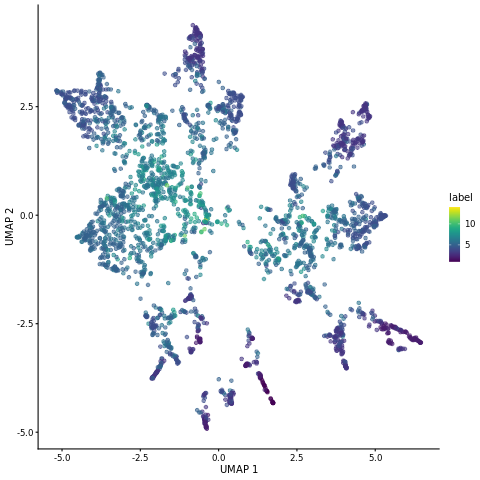

In [65]:
%%R
colLabels(sce_vsg) <- count_feature
plotReducedDim(sce_vsg, "UMAP", colour_by="label")

In [66]:
#%%R
#is.vsg6_8 <- is.vsg6 | is.vsg8 
#is.other <- is.vsg15 | is.vsg17 | is.vsg2
#is.vsg6_8 <- is.vsg6_8 & is.other 
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGAAACACT-1,47,0,0,0,0,1,0,3,0,0,...,2,0,1,0,0,0,0,-1.991373,-3.637073,3
AAACCCAAGAGCCTGA-1,39,0,6,0,1,2,3,3,0,4,...,0,0,0,0,0,0,0,-1.513956,-0.589964,5
AAACCCAAGAGCGACT-1,48,0,16,0,0,0,0,8,0,3,...,0,0,0,0,0,0,0,-4.020341,-0.149115,5
AAACCCAAGTTCTACG-1,128,0,19,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,-3.568099,3.022005,6
AAACCCACAATCAGCT-1,59,0,18,0,4,0,1,1,0,3,...,0,0,0,0,0,0,0,2.632492,-1.303855,5


In [67]:
umap.sum().drop(['comp1','comp2','clusters']).sort_values()

vsg-19-Tb427.BES10.10          0
vsg-mes-Tb427VSG-639           2
vsg-mes-Tb427VSG-559           6
vsg-16-Tb427.BES122.11        12
vsg-mes-Tb427VSG-636          15
vsg-mes-Tb427VSG-1954         48
vsg-21-Tb427.BES28.15         88
vsg-mes-Tb427VSG-397         135
vsg-mes-Tb427VSG-531         146
vsg-mes-Tb427VSG-3591        152
vsg-mes-Tb427VSG-653         351
vsg-14-Tb427.BES64.2         369
vsg-9-Tb427.BES129.14        477
vsg-11-Tb427.BES126.15       515
vsg-3-Tb427.BES65.13         541
vsg-13-Tb427.BES51.12        637
vsg-18-Tb427.BES98.12       1912
vsg-8-Tb427.BES29.9         4357
vsg-15-Tb427.BES134.6       7392
vsg-17-Tb427.BES56.13       7594
vsg-6-Tb427.BES15.12       16604
vsg-2-Tb427.BES40.22      162890
dtype: object

In [68]:
select = umap.drop(['comp1','comp2','clusters'],axis=1)
select.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-11-Tb427.BES126.15,vsg-13-Tb427.BES51.12,vsg-mes-Tb427VSG-397,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGAAACACT-1,47,0,0,0,0,1,0,3,0,0,...,0,0,0,2,0,1,0,0,0,0
AAACCCAAGAGCCTGA-1,39,0,6,0,1,2,3,3,0,4,...,0,1,0,0,0,0,0,0,0,0
AAACCCAAGAGCGACT-1,48,0,16,0,0,0,0,8,0,3,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGTTCTACG-1,128,0,19,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACAATCAGCT-1,59,0,18,0,4,0,1,1,0,3,...,0,2,0,0,0,0,0,0,0,0


In [69]:
vsg_class = []
for n in range(select.shape[0]):
    temp = select.iloc[n]
    temp = temp[temp>0]
    temp = list(temp.index)
    temp.sort()
    #print(temp)
    temp = [b for b in temp if b not in ['comp1','comp2']]
    temp.sort()
    temp=tuple(temp)
    vsg_class.append(temp)
    
    

umap['vsg_class'] = vsg_class
umap['size_class'] = [len(n) for n in  umap['vsg_class']]
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGAAACACT-1,47,0,0,0,0,1,0,3,0,0,...,1,0,0,0,0,-1.991373,-3.637073,3,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",6
AAACCCAAGAGCCTGA-1,39,0,6,0,1,2,3,3,0,4,...,0,0,0,0,0,-1.513956,-0.589964,5,"(vsg-13-Tb427.BES51.12, vsg-14-Tb427.BES64.2, ...",9
AAACCCAAGAGCGACT-1,48,0,16,0,0,0,0,8,0,3,...,0,0,0,0,0,-4.020341,-0.149115,5,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",5
AAACCCAAGTTCTACG-1,128,0,19,0,1,0,0,1,0,0,...,0,0,0,0,0,-3.568099,3.022005,6,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",5
AAACCCACAATCAGCT-1,59,0,18,0,4,0,1,1,0,3,...,0,0,0,0,0,2.632492,-1.303855,5,"(vsg-13-Tb427.BES51.12, vsg-14-Tb427.BES64.2, ...",8


In [70]:
umap.vsg_class.value_counts().head(10)

(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)                           229
(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                                                158
(vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                                                                       120
(vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)                                                  110
(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13, vsg-18-Tb427.BES98.12, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)    107
(vsg-15-Tb427.BES134.6, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)                                                   88
(vsg-15-Tb427.BES134.6, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                                                                        85
(vsg-2

In [71]:
umap.size_class.value_counts()

5     791
4     683
6     584
3     450
7     278
2     139
8      87
9      32
1      29
10      7
11      3
14      1
Name: size_class, dtype: int64

In [72]:
umap.to_csv("new_count_vsg_vex2_2.csv")
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGAAACACT-1,47,0,0,0,0,1,0,3,0,0,...,1,0,0,0,0,-1.991373,-3.637073,3,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",6
AAACCCAAGAGCCTGA-1,39,0,6,0,1,2,3,3,0,4,...,0,0,0,0,0,-1.513956,-0.589964,5,"(vsg-13-Tb427.BES51.12, vsg-14-Tb427.BES64.2, ...",9
AAACCCAAGAGCGACT-1,48,0,16,0,0,0,0,8,0,3,...,0,0,0,0,0,-4.020341,-0.149115,5,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",5
AAACCCAAGTTCTACG-1,128,0,19,0,1,0,0,1,0,0,...,0,0,0,0,0,-3.568099,3.022005,6,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",5
AAACCCACAATCAGCT-1,59,0,18,0,4,0,1,1,0,3,...,0,0,0,0,0,2.632492,-1.303855,5,"(vsg-13-Tb427.BES51.12, vsg-14-Tb427.BES64.2, ...",8


In [73]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('new_count_vsg_vex2_2.csv',index_col =[0])
df.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGAAACACT-1,47,0,0,0,0,1,0,3,0,0,...,1,0,0,0,0,-1.991373,-3.637073,3,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",6
AAACCCAAGAGCCTGA-1,39,0,6,0,1,2,3,3,0,4,...,0,0,0,0,0,-1.513956,-0.589964,5,"('vsg-13-Tb427.BES51.12', 'vsg-14-Tb427.BES64....",9
AAACCCAAGAGCGACT-1,48,0,16,0,0,0,0,8,0,3,...,0,0,0,0,0,-4.020341,-0.149115,5,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",5
AAACCCAAGTTCTACG-1,128,0,19,0,1,0,0,1,0,0,...,0,0,0,0,0,-3.568099,3.022005,6,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",5
AAACCCACAATCAGCT-1,59,0,18,0,4,0,1,1,0,3,...,0,0,0,0,0,2.632492,-1.303855,5,"('vsg-13-Tb427.BES51.12', 'vsg-14-Tb427.BES64....",8


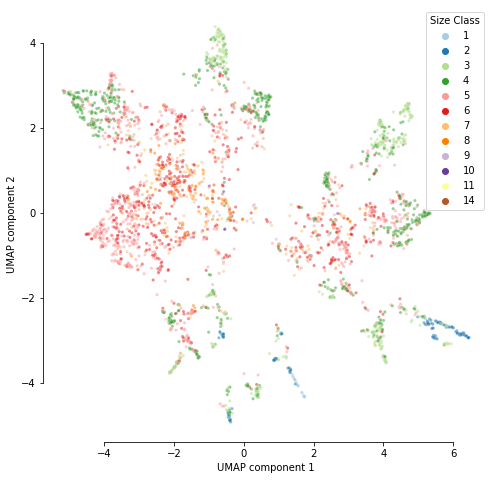

In [75]:
fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df, x='comp1',y='comp2', hue='size_class', ax=ax,
                alpha=0.5, s=10,palette ='Paired')
ax.legend(title='Size Class')
ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')
sns.despine(fig,trim=True)

In [25]:
#ls -l .snapshots/@GMT-2022.09.06-00.00.00/

total 16167
-rw-r-----  1 mtinti lsd 2660386072 Dec 17  2021 all.tgz
-rw-r--r--  1 mtinti lsd    2940601 Oct 22  2021 analysis-Copy1.ipynb
-rw-r--r--  1 mtinti lsd    2469135 Oct 22  2021 analysis.ipynb
-rw-r--r--  1 mtinti lsd      96921 Nov 11  2021 analysis_swapping.ipynb
-rw-r--r--  1 mtinti lsd    2854010 Jan 17  2022 analysis_VEX1_RNAi_1.ipynb
-rw-r--r--  1 mtinti lsd    3015753 Jan 17  2022 analysis_VEX1_RNAi_1-soup.ipynb
-rw-r--r--  1 mtinti lsd    4920288 Dec 17  2021 analysis_VEX1_RNAi_2_B-soup.ipynb
-rw-r--r--  1 mtinti lsd    2617468 Dec  3  2021 analysis_VEX1_RNAi_2.ipynb
-rw-r--r--  1 mtinti lsd    2291280 Jan 17  2022 analysis_VEX1_RNAi_2-soup.ipynb
-rw-r--r--  1 mtinti lsd    2512258 Dec  3  2021 analysis_VEX2_RNAi_1.ipynb
-rw-r--r--  1 mtinti lsd    4165493 Feb  9  2022 analysis_VEX2_RNAi_1-soup.ipynb
-rw-r--r--  1 mtinti lsd     829890 Feb 10  2022 analysis_VEX2_RNAi_1-soup_only_vsg-6-8-15-17.ipynb
-rw-r--r--  1 mtinti lsd    1450245 Feb 11  2022 analysis_VEX2_RNAi_1-

In [ ]:
ls -l .snapshots/@GMT-2022.08.01-00.00.00/

total 64
-rw-r-----  1 mtinti lsd 2660386072 Dec 17  2021 all.tgz
-rw-r--r--  1 mtinti lsd    2940601 Oct 22  2021 analysis-Copy1.ipynb
-rw-r--r--  1 mtinti lsd    2469135 Oct 22  2021 analysis.ipynb
-rw-r--r--  1 mtinti lsd      96921 Nov 11  2021 analysis_swapping.ipynb
-rw-r--r--  1 mtinti lsd    2854010 Jan 17  2022 analysis_VEX1_RNAi_1.ipynb
-rw-r--r--  1 mtinti lsd    3015753 Jan 17  2022 analysis_VEX1_RNAi_1-soup.ipynb
-rw-r--r--  1 mtinti lsd    4920288 Dec 17  2021 analysis_VEX1_RNAi_2_B-soup.ipynb
-rw-r--r--  1 mtinti lsd    2617468 Dec  3  2021 analysis_VEX1_RNAi_2.ipynb
-rw-r--r--  1 mtinti lsd    2291280 Jan 17  2022 analysis_VEX1_RNAi_2-soup.ipynb
-rw-r--r--  1 mtinti lsd    2512258 Dec  3  2021 analysis_VEX2_RNAi_1.ipynb
-rw-r--r--  1 mtinti lsd    4165493 Feb  9  2022 analysis_VEX2_RNAi_1-soup.ipynb
-rw-r--r--  1 mtinti lsd     829890 Feb 10  2022 analysis_VEX2_RNAi_1-soup_only_vsg-6-8-15-17.ipynb
-rw-r--r--  1 mtinti lsd    1450245 Feb 11  2022 analysis_VEX2_RNAi_1-sou

In [ ]:
#cp -R .snapshots/@GMT-2022.08.01-00.00.00/VEX1_RNAi_1_count6/ .

In [15]:
#cp -R .snapshots/@GMT-2022.08.01-00.00.00/VEX1_RNAi_2_count6/ .

In [16]:
#cp -R .snapshots/@GMT-2022.08.01-00.00.00/VEX2_RNAi_1_count6/ .

In [17]:
#cp -R .snapshots/@GMT-2022.08.01-00.00.00/VEX2_RNAi_2_count6/ .

In [18]:
#cp -R .snapshots/@GMT-2022.08.01-00.00.00/VSG-2_1_count6/ .

In [22]:
#cp -R .snapshots/@GMT-2022.08.01-00.00.00/VSG-2_2_count6/ .

In [20]:
#cp -R .snapshots/@GMT-2022.08.01-00.00.00/VSG-2_VSG-6_1_count6/ .

In [21]:
#cp -R .snapshots/@GMT-2022.08.01-00.00.00/VSG-2_VSG-6_2_count6/ .

In [ ]:
!qsub 

/bin/bash: qsub: command not found
